# PM Coded Project

### Context
An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

### Objective
ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

In [149]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## Exploratory Data Analysis

In [150]:
df = pd.read_csv(r"C:\Users\LOKI\Downloads\ottdata.csv")

In [151]:
df

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46
...,...,...,...,...,...,...,...,...
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47


In [152]:
a,b = df.shape
print(f"There are {a} rows and {b} columns in this dataset")

There are 1000 rows and 8 columns in this dataset


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [154]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In [156]:
df["major_sports_event"].unique()

array([0, 1], dtype=int64)

In [157]:
df["genre"].unique()

array(['Horror', 'Thriller', 'Sci-Fi', 'Others', 'Drama', 'Action',
       'Comedy', 'Romance'], dtype=object)

In [158]:
df["dayofweek"].unique()

array(['Wednesday', 'Friday', 'Sunday', 'Thursday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [159]:
df["season"].unique()

array(['Spring', 'Fall', 'Winter', 'Summer'], dtype=object)

### Univariate Analysis

In [160]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [161]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

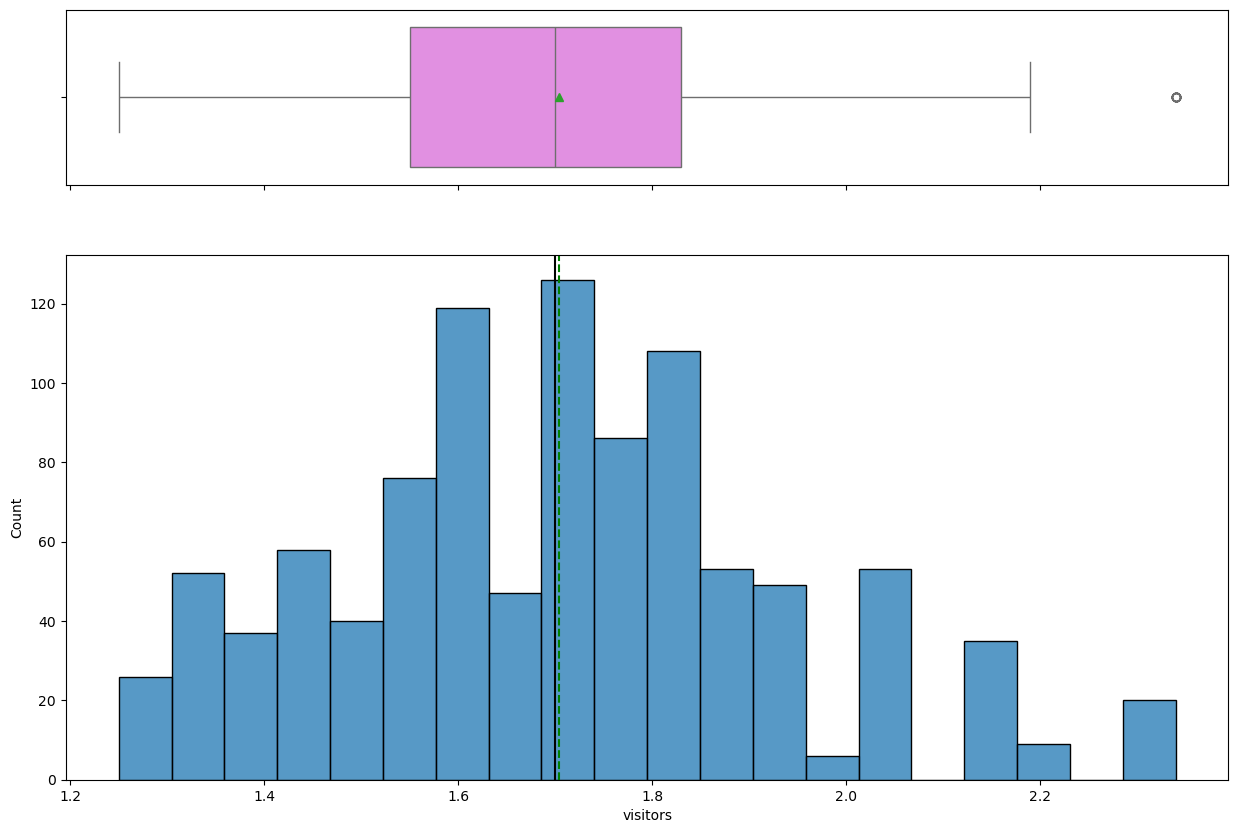

In [162]:
histogram_boxplot(df,"visitors")

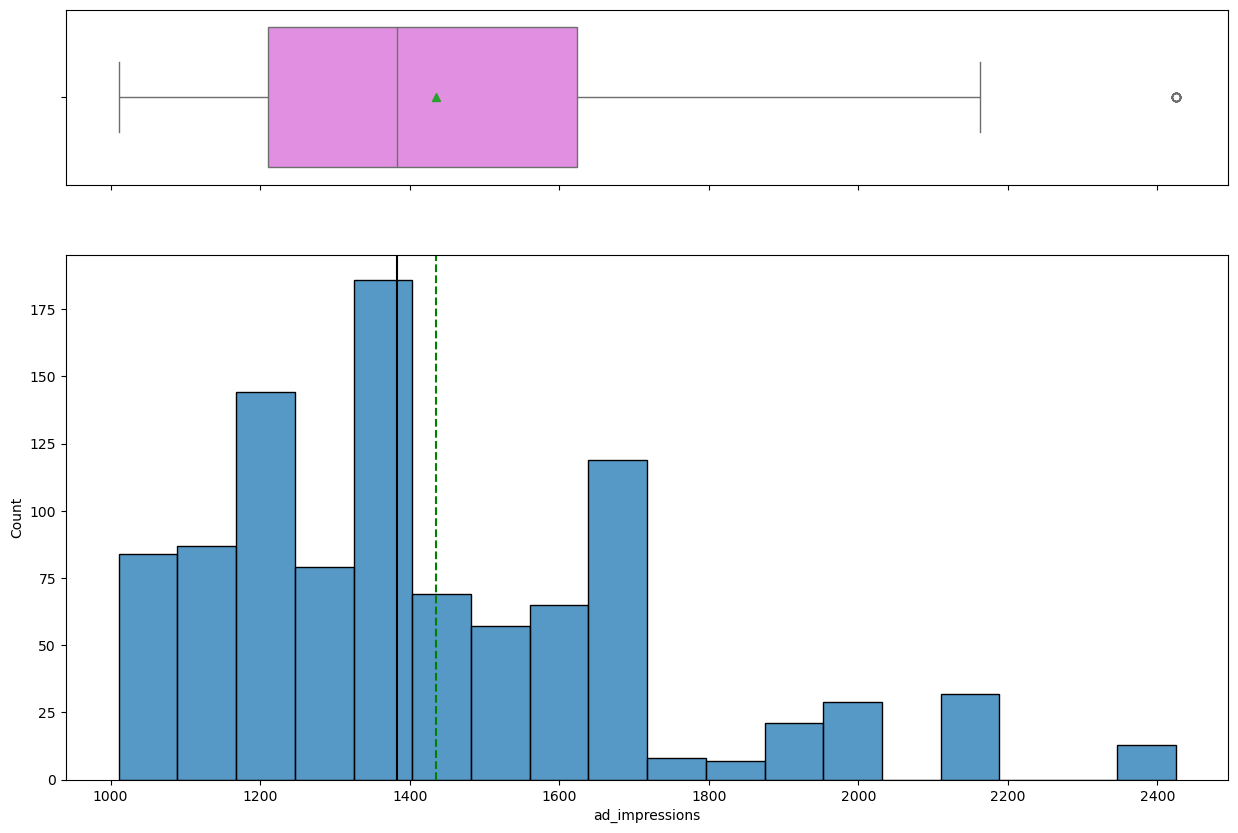

In [163]:
histogram_boxplot(df,"ad_impressions")

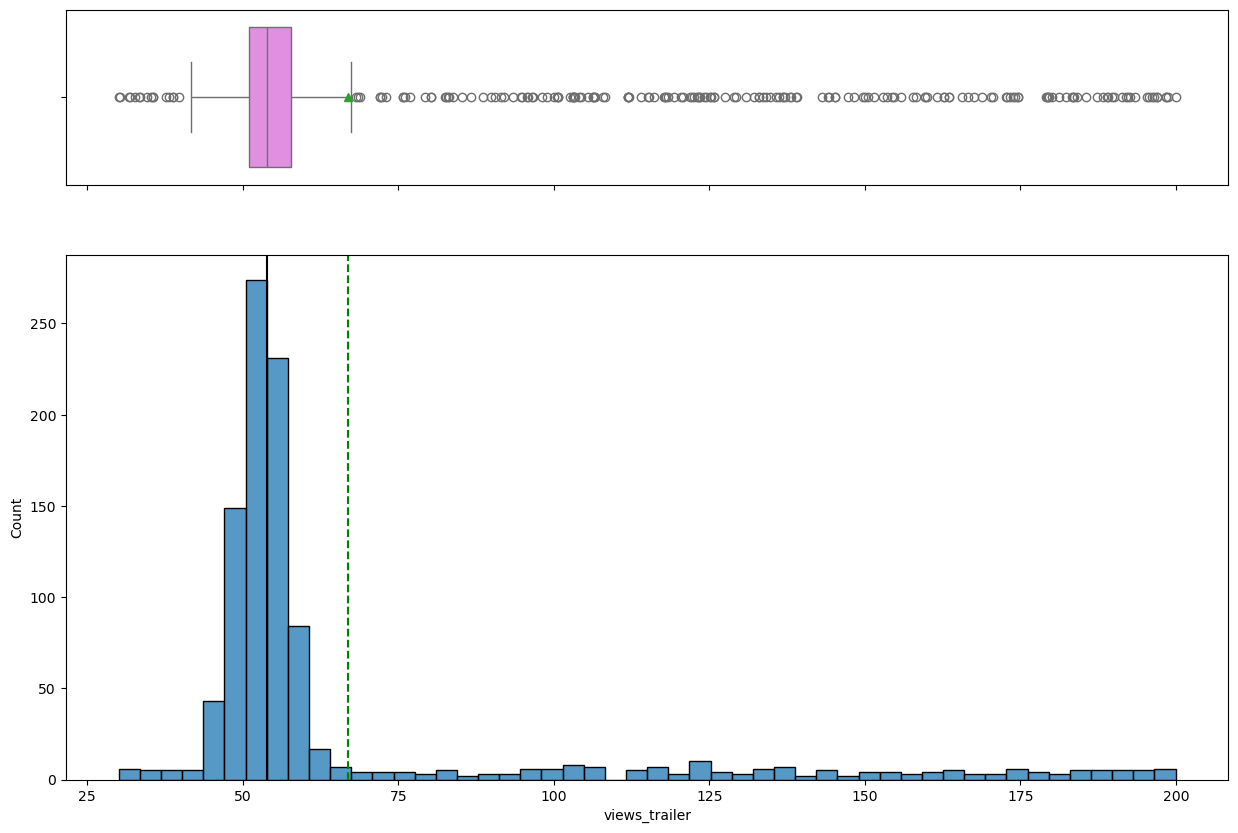

In [164]:
histogram_boxplot(df,"views_trailer",bins=50)

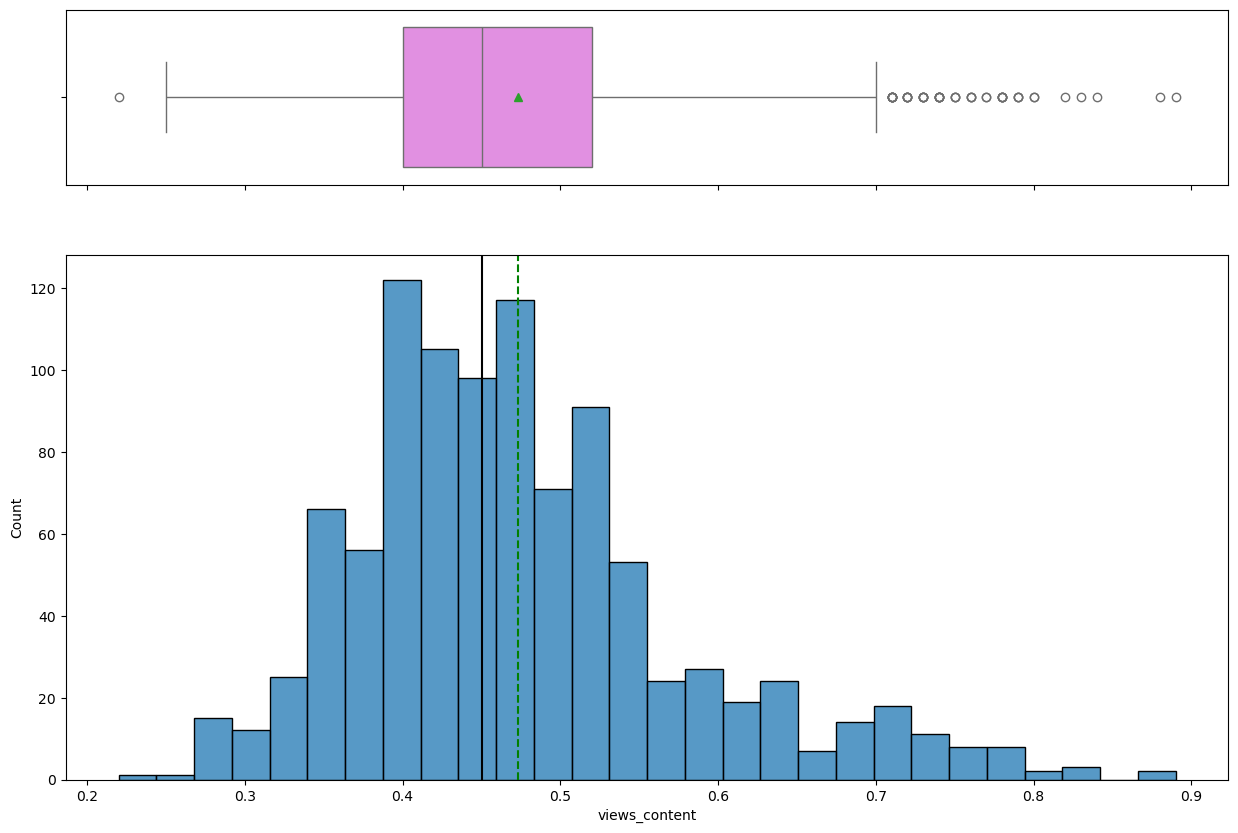

In [165]:
histogram_boxplot(df,"views_content")

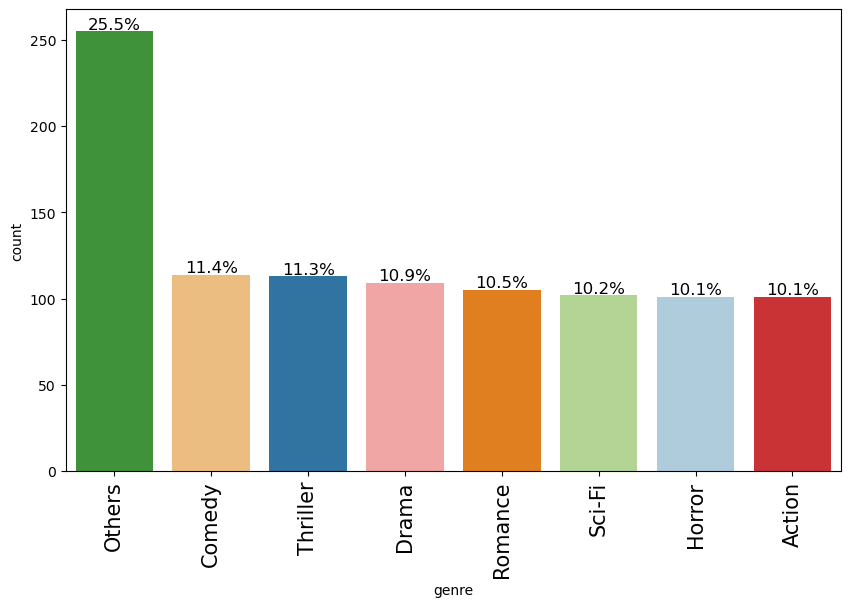

In [166]:
labeled_barplot(df,"genre",perc=True)

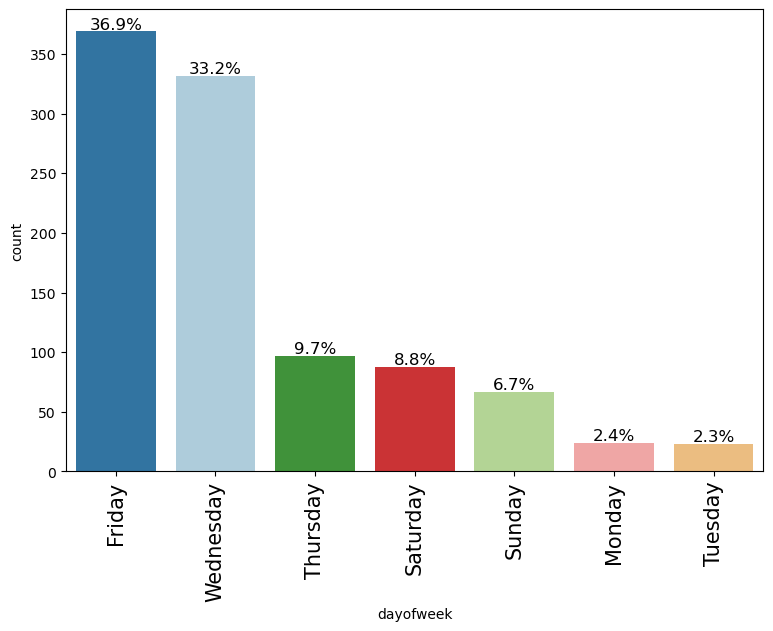

In [167]:
labeled_barplot(df,"dayofweek",perc=True)

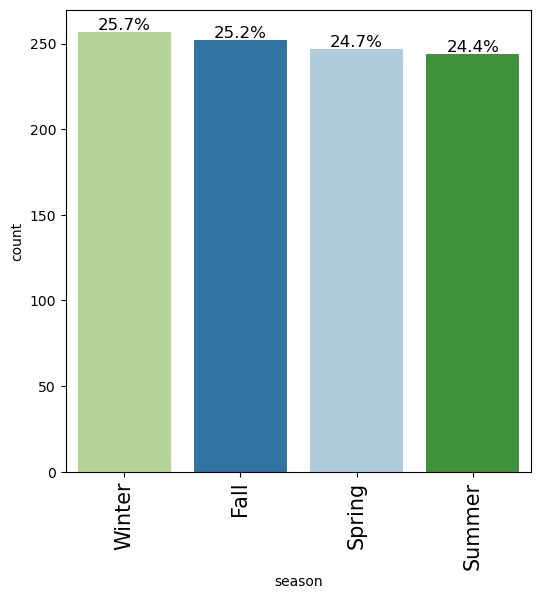

In [168]:
labeled_barplot(df,"season",perc=True)

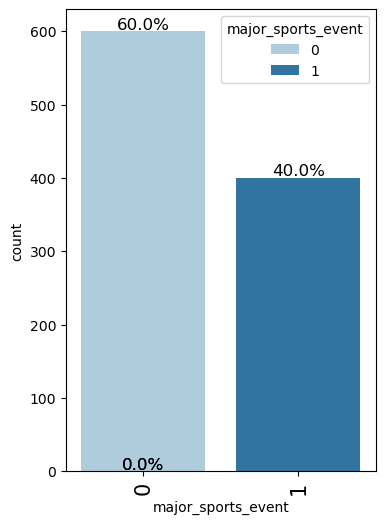

In [169]:
labeled_barplot(df,"major_sports_event",perc=True)

### Bivariate Analysis

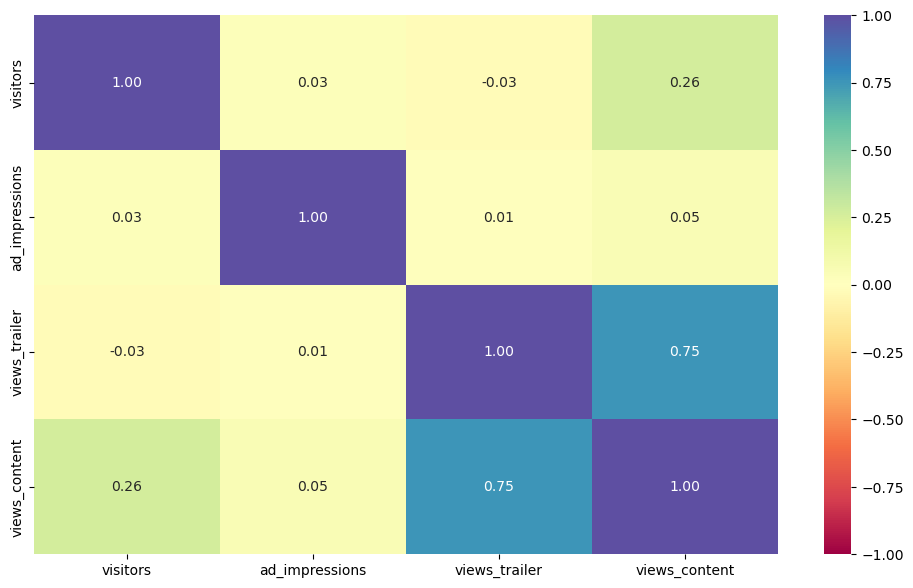

In [170]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("major_sports_event")

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

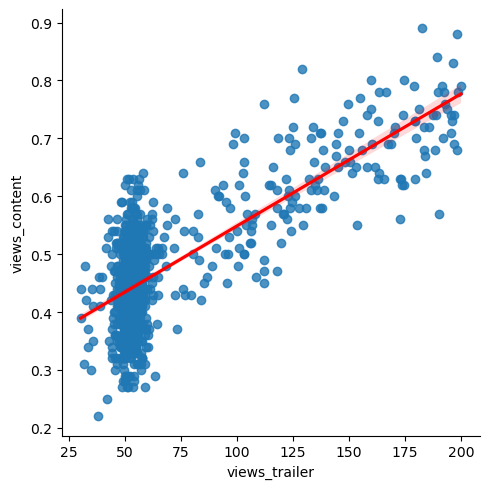

In [171]:
sns.lmplot(df,x="views_trailer", y= "views_content", line_kws={'color': 'red'});

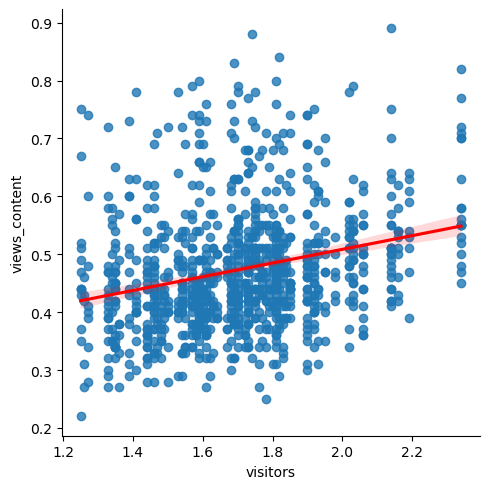

In [172]:
sns.lmplot(df,x="visitors", y= "views_content", line_kws={'color': 'red'});

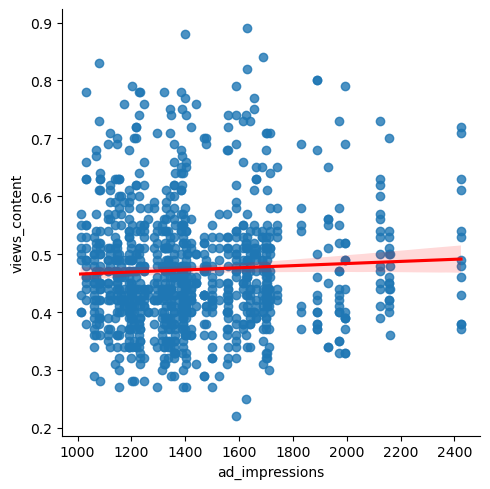

In [173]:
sns.lmplot(df,x="ad_impressions", y= "views_content", line_kws={'color': 'red'});

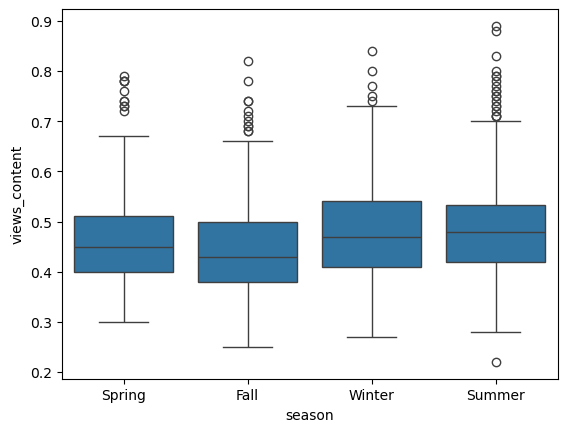

In [174]:
sns.boxplot(df,x="season",y="views_content");

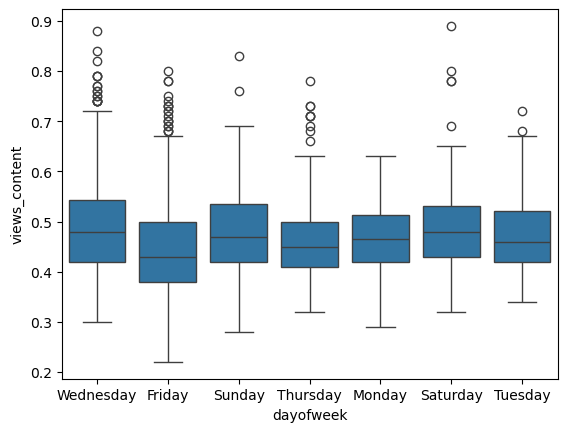

In [175]:
sns.boxplot(df,x="dayofweek",y="views_content");

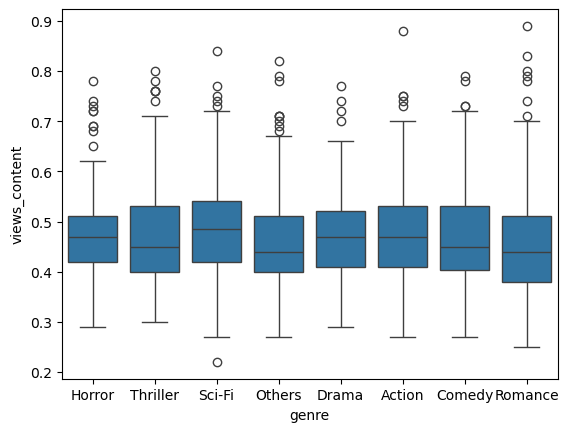

In [176]:
sns.boxplot(df,x="genre",y="views_content");

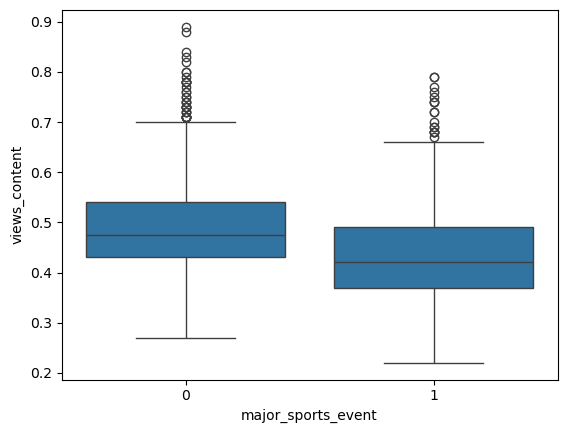

In [177]:
sns.boxplot(df,x="major_sports_event",y="views_content");

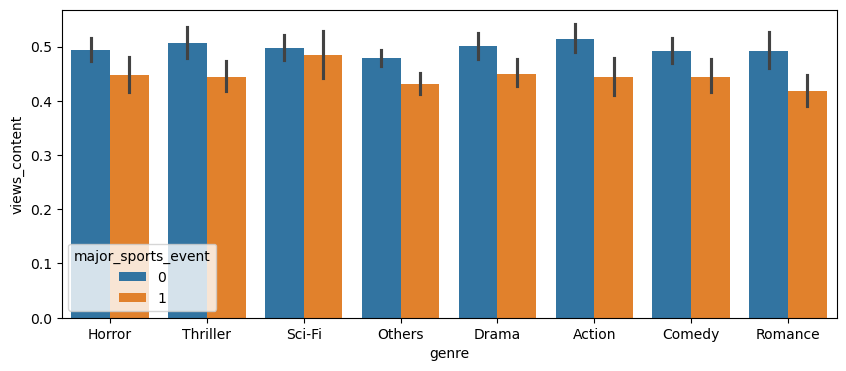

In [178]:
plt.figure(figsize=(10,4))
sns.barplot(df, x="genre", y="views_content", hue="major_sports_event");

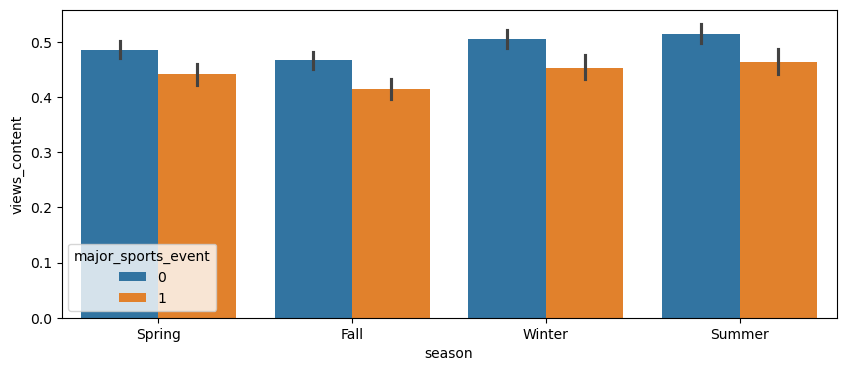

In [179]:
plt.figure(figsize=(10,4))
sns.barplot(df, x="season", y="views_content", hue="major_sports_event");

## EDA Questions

### 1. What does the distribution of content views look like?

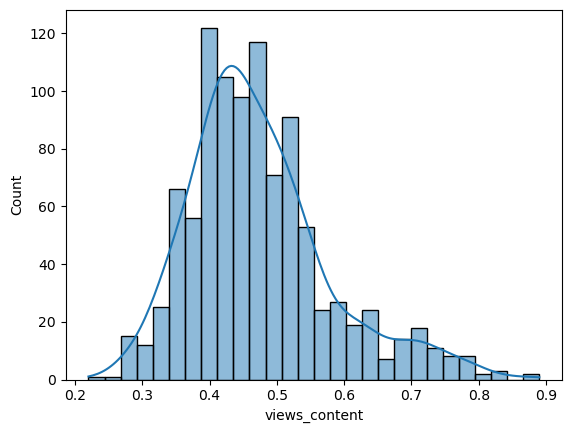

In [180]:
sns.histplot(df, x="views_content", kde=True);

### 2. What does the distribution of genres look like?

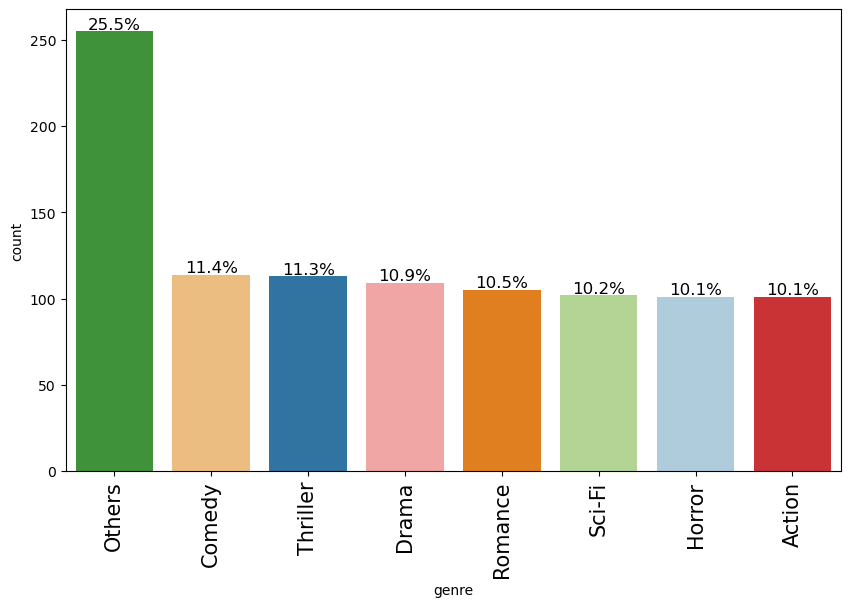

In [181]:
labeled_barplot(df,"genre",perc=True)

### 3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

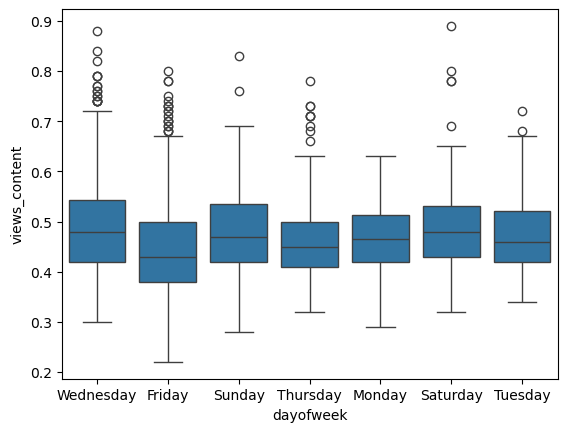

In [182]:
sns.boxplot(df, x="dayofweek", y="views_content");

### 4. How does the viewership vary with the season of release?

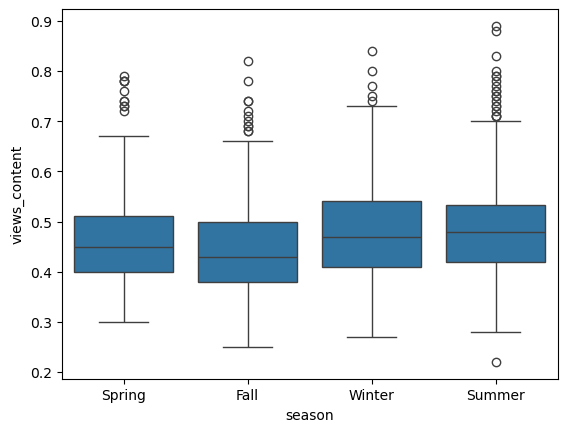

In [183]:
sns.boxplot(df, x="season", y="views_content");

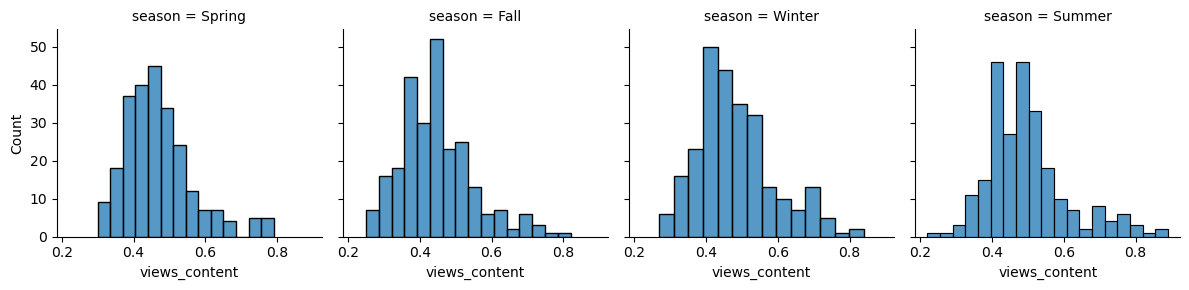

In [184]:
g = sns.FacetGrid(df, col="season")
g.map(sns.histplot,"views_content");

### 5. What is the correlation between trailer views and content views?

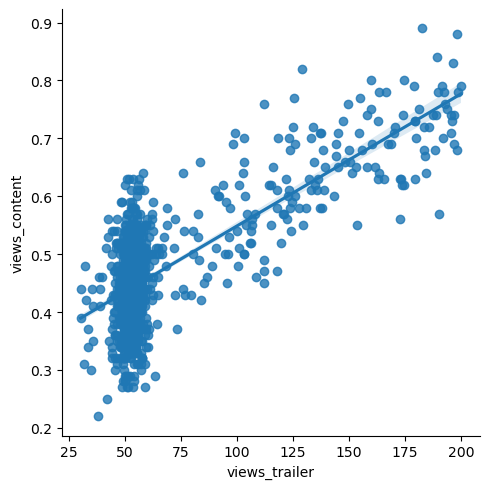

In [185]:
sns.lmplot(df, x="views_trailer", y="views_content");

## Data preprocessing

###  Duplicate value check

In [186]:
print(f"There are {df.duplicated().sum()} duplicates in the dataset.")

There are 0 duplicates in the dataset.


### Missing value treatment

In [187]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

There are no null values or missing values in this dataset.

### Outlier treatment

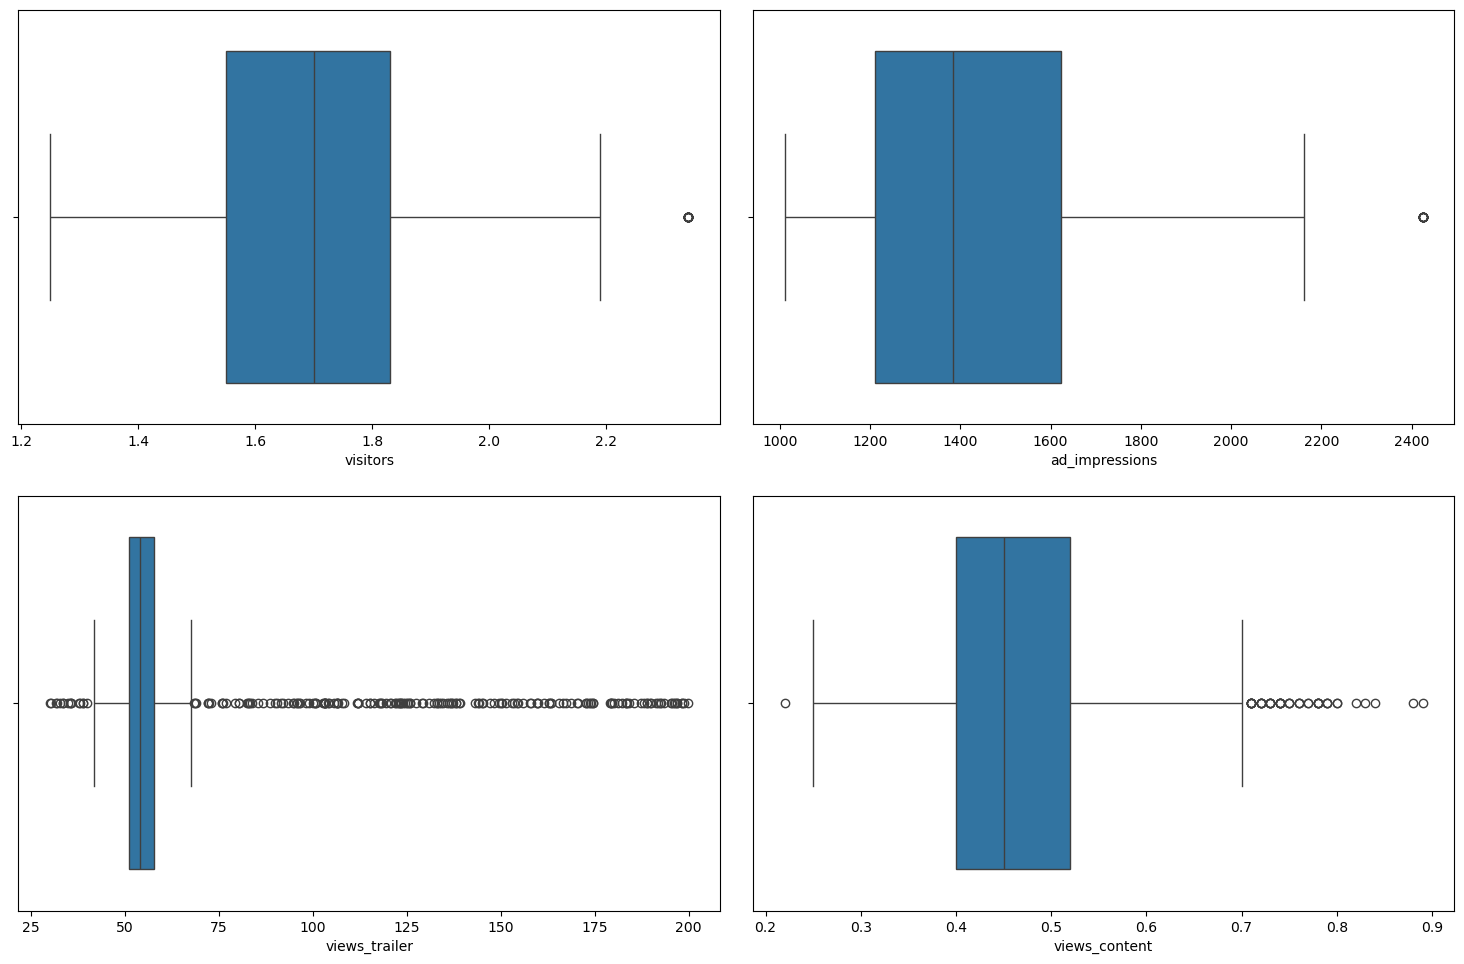

In [188]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# removing the 'major_sports_event' column because it works likes a categorical column
num_cols.remove("major_sports_event")

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for Modeling

In [189]:
# defining X and y variables
X = df.drop(["views_content"], axis=1)
y = df["views_content"]

In [190]:
print(X.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  


In [191]:
print(y.head())

0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [192]:
# let's add the intercept to data
X = sm.add_constant(X)

In [193]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,1,52.69,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,1,48.74,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,1,49.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,0,55.83,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [194]:
print("Columns after one-hot encoding:")
for i in X.columns:
    print(i)

Columns after one-hot encoding:
const
visitors
ad_impressions
major_sports_event
views_trailer
genre_Comedy
genre_Drama
genre_Horror
genre_Others
genre_Romance
genre_Sci-Fi
genre_Thriller
dayofweek_Monday
dayofweek_Saturday
dayofweek_Sunday
dayofweek_Thursday
dayofweek_Tuesday
dayofweek_Wednesday
season_Spring
season_Summer
season_Winter


In [195]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [196]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [197]:
print("Number of rows in train dataset =", x_train.shape[0])
print("Number of rows in test dataset =", x_test.shape[0])

Number of rows in train dataset = 700
Number of rows in test dataset = 300


## Model building - Linear Regression

In [198]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          1.32e-215
Time:                        22:36:35   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

### Model performance check

In [199]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [200]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [201]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


## Testing the assumptions of linear regression model

### Test for Multicollinearity

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [203]:
checking_vif(x_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


- If VIF is between 1 and 5, then there is low multicollinearity.
- As we can clearly see, The VIF values of all the columns are below 5.

### Dealing With p-values

In [204]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [205]:
x_train1= x_train[selected_features]
x_test1= x_test[selected_features]

In [206]:
olsmod1 = sm.OLS(y_train, x_train1).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          7.03e-224
Time:                        22:36:35   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [207]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod1_train_perf = model_performance_regression(olsmod1, x_train1, y_train)
olsmod1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [208]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod1_test_perf = model_performance_regression(olsmod1, x_test1, y_test)
olsmod1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


### TEST FOR LINEARITY AND INDEPENDENCE

In [209]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod1.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod1.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


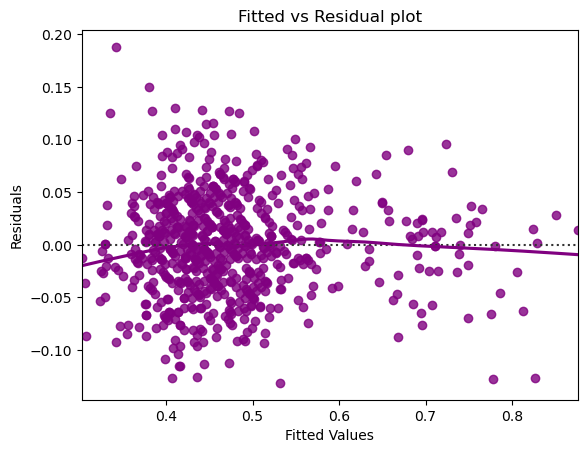

In [210]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

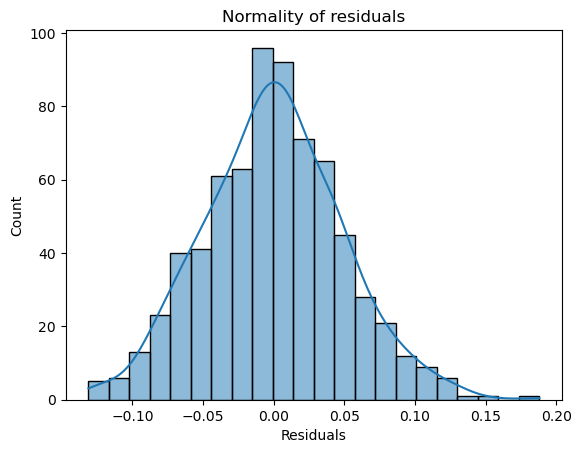

In [211]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

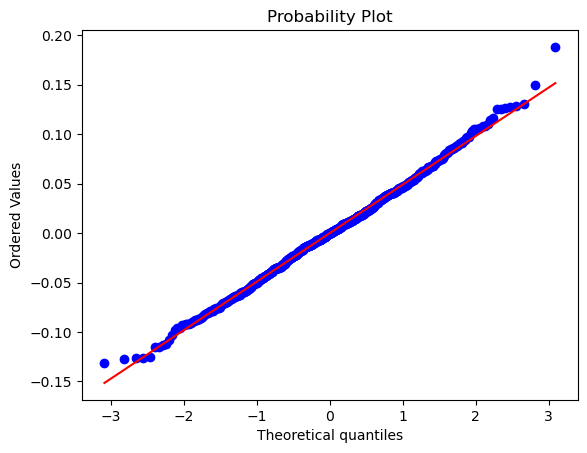

In [212]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [213]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9973143339157104, pvalue=0.3104695975780487)

### TEST FOR HOMOSCEDASTICITY

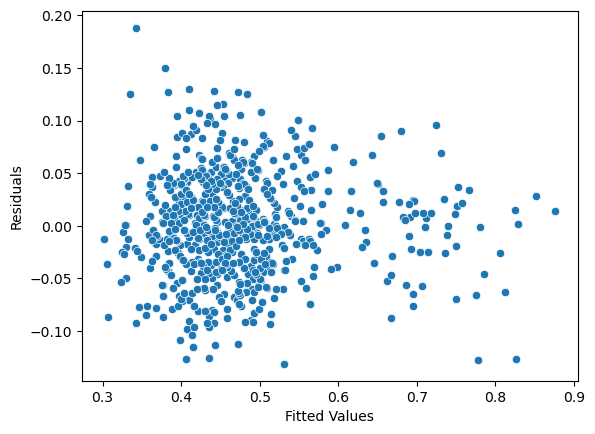

In [214]:
sns.scatterplot(df_pred, x="Fitted Values", y= "Residuals");

In [215]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train1)
lzip(name, test)

[('F statistic', 1.1313612904200754), ('p-value', 0.12853551819086995)]

## Final Model

In [216]:
x_train_final = x_train1.copy()
x_test_final = x_test1.copy()

In [217]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          7.03e-224
Time:                        22:36:36   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

## Model performance evaluation

In [218]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [219]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


### Linear Regression Equation

In [220]:
# Let us write the equation of linear regression
Equation = "views_content ="
print(Equation, end=" ")
for i in range(len(x_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train_final.columns[i], ")")

views_content = 0.07467052053721139 + 0.1290958182589413 * ( visitors ) +  -0.06055507818137333 * ( major_sports_event ) +  0.0023308167861640135 * ( views_trailer ) +  0.03206580679023633 * ( dayofweek_Monday ) +  0.057028596601651174 * ( dayofweek_Saturday ) +  0.034386229923625104 * ( dayofweek_Sunday ) +  0.015449441769973156 * ( dayofweek_Thursday ) +  0.04649480366984811 * ( dayofweek_Wednesday ) +  0.02260491581811801 * ( season_Spring ) +  0.04339100263609971 * ( season_Summer ) +  0.028230557183976768 * ( season_Winter )
